In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob
import gzip
import gc
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def extract_five_grams(term):
    words = list()
    for i, idx in vectorizer.vocabulary_.items():
        i = i.split()
        if i[2] == term:
            # get sums
            vocab_sums = dtm.sum(axis=0)
            count = (vocab_sums[0, idx]) 
            for j in range(count):
                words.append(i[0])
                words.append(i[1])
                words.append(i[3])
                words.append(i[4])
    return(words)

In [3]:
files = glob("../texts/eebo/eebo-year*gz")
labels = [os.path.basename(x).split(".")[0] for x in files]
labels = [x.split("-")[2] for x in labels]

In [4]:
# create a list of file objects
fp_list = [gzip.open(x) for x in files]

In [5]:
#
# DEFINE term of interest
# 
# we'll search for five-grams with this word as the center word:
# [term1,term2,key_term,term4,term5]

key_term = "elect"

five_gram_data = dict()
for i, y in enumerate(fp_list):
    # re-establisher vectorizer
    vectorizer = CountVectorizer(
        input='files',
        lowercase=True,
        ngram_range=(5,5),
        stop_words='english')
    
    print("starting: {0}".format(labels[i]))

    # vectorize model
    print(" vectorizing...")
    dtm = vectorizer.fit_transform(fp_list[i])

    print(" extracting five-gram terms...")
    terms = extract_five_grams("elect")
    five_gram_data[labels[i]] = terms
    
    # free memory
    del vectorizer, dtm
    gc.collect()

starting: 1561
vectorizing...
extracting five-gram terms...
starting: 1555
vectorizing...
extracting five-gram terms...
starting: 1548
vectorizing...
extracting five-gram terms...
starting: 1617
vectorizing...
extracting five-gram terms...
starting: 1526
vectorizing...
extracting five-gram terms...
starting: 1546
vectorizing...
extracting five-gram terms...
starting: 1590
vectorizing...
extracting five-gram terms...
starting: 1547
vectorizing...
extracting five-gram terms...
starting: 1634
vectorizing...
extracting five-gram terms...
starting: 1532
vectorizing...
extracting five-gram terms...
starting: 1530
vectorizing...
extracting five-gram terms...
starting: 1596
vectorizing...
extracting five-gram terms...
starting: 1540
vectorizing...
extracting five-gram terms...
starting: 1594
vectorizing...
extracting five-gram terms...
starting: 1628
vectorizing...
extracting five-gram terms...
starting: 1580
vectorizing...
extracting five-gram terms...
starting: 1523
vectorizing...
extracting

In [12]:
# now collect frequencies
year_frequencies = dict()
for y in five_gram_data:
    t = list()
    w = set(five_gram_data[y])
    for i in w:
        t.append([i,five_gram_data[y].count(i)])
    year_frequencies[y] = t

In [74]:
def graph_year(key_term,year):
    G = nx.Graph()
    node_list = list()
    labels=dict()

    # ensure that we have our key term
    labels[key_term] = key_term
    G.add_node(key_term)
    
    center_term = dict()
    center_term[key_term] = (0,-20)
    
    for t, w in sorted(year_frequencies[year], key=lambda x: x[1], reverse=True)[:15]:
        G.add_node(t)
        node_list.append(t)
        G.add_edge(key_term,t,weight=w)
        labels[t] = t
   
    plt.figure(figsize=(15,12))   
    pos=nx.spring_layout(G,scale=2,k=10,pos=center_term,fixed=center_term)
    nx.draw_networkx_nodes(G,pos,node_color='lightblue',node_size=1500)
    nx.draw_networkx_labels(G,pos,labels,font_size=10)

    all_weights = []
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight'])
    unique_weights = list(set(all_weights))

    for weight in unique_weights:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) 
                          if edge_attr['weight']==weight]
        width = weight*len(node_list)*3.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
    plt.show()

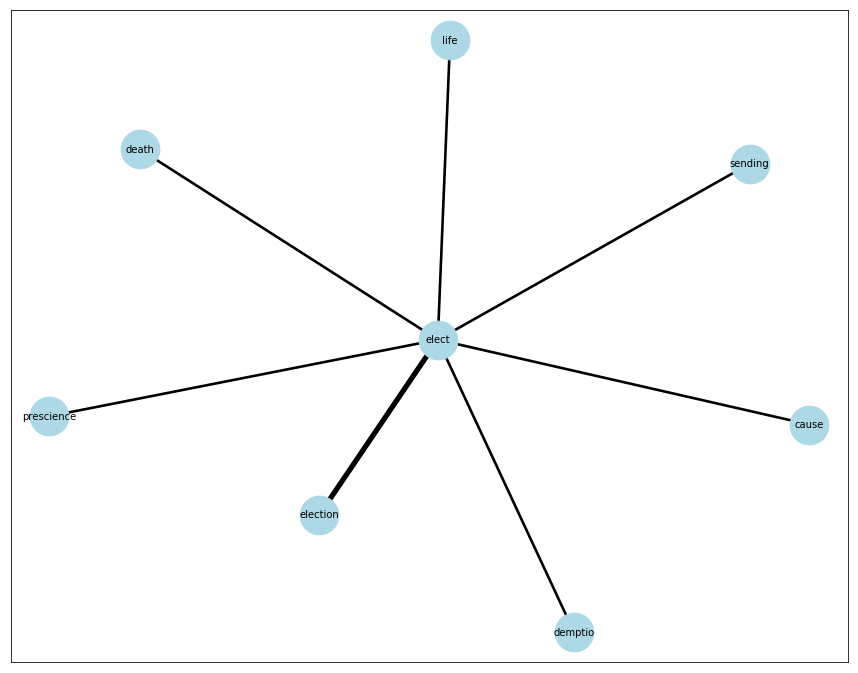

In [75]:
graph_year("elect","1546")

In [1]:
graph_year("elect","1600")

NameError: name 'graph_year' is not defined

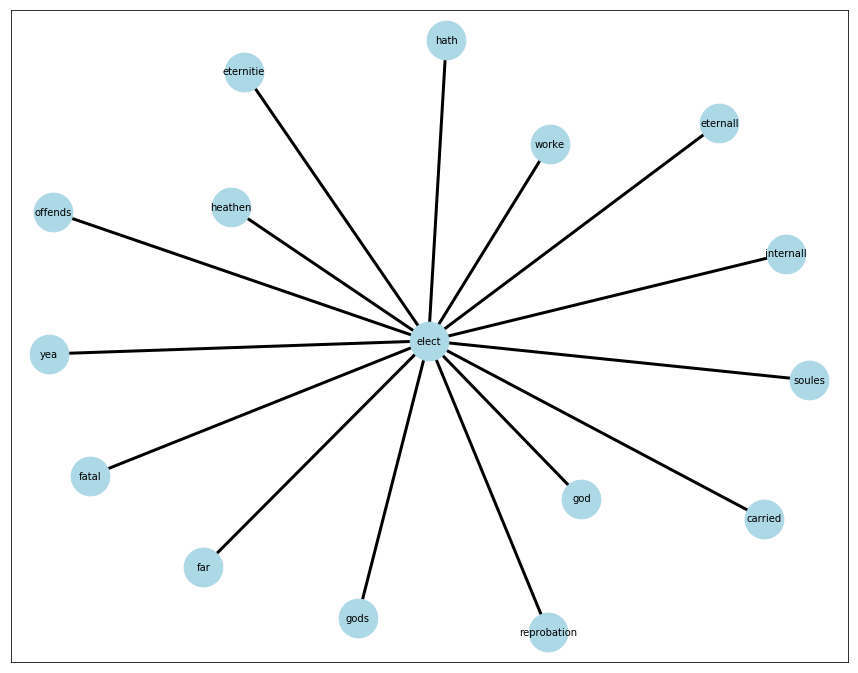

In [77]:
graph_year("elect","1620")

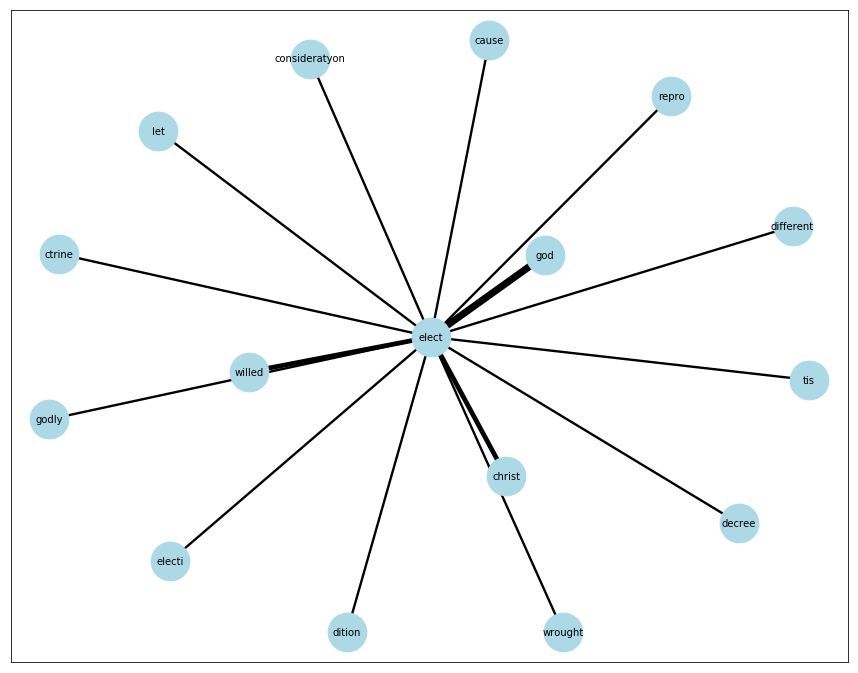

In [78]:
graph_year("elect","1600")